In [1]:
pip install numpy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


Text(0, 0.5, 'Height')

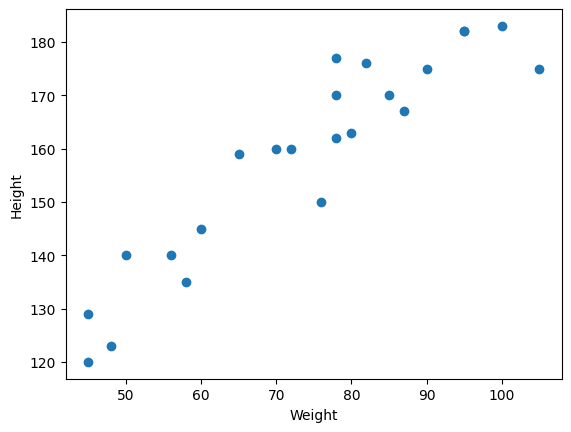

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

c:\Users\dhyey\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


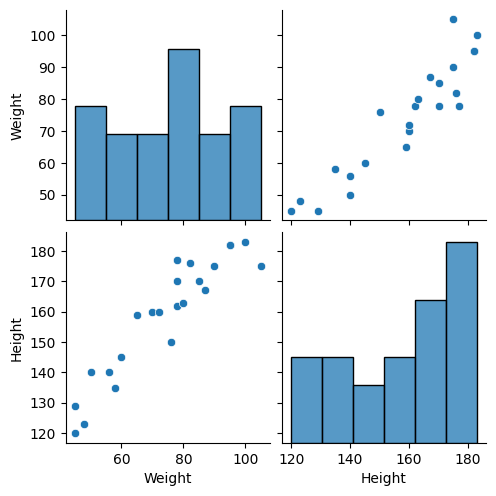

In [7]:
import seaborn as sns # lib is used for visualization
sns.pairplot(df)

In [47]:
x = df[['Weight']]  # Independent feature as a DataFrame (2D array)
y = df['Height']  # Dependent variable as a Series (1D array)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler  # For standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # Transform the training data
x_test = scaler.transform(x_test)  # Transform the test data

# Now x_train and x_test are standardized and ready for modeling


In [48]:
# apply linear regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# predicting on test data

LinearRegression()

In [51]:
print("coefficients or slope",model.coef_) # coefficients of the regression
print("intercept",model.intercept_) # intercept of the regression

coefficients or slope [17.2982057]
intercept 156.47058823529412


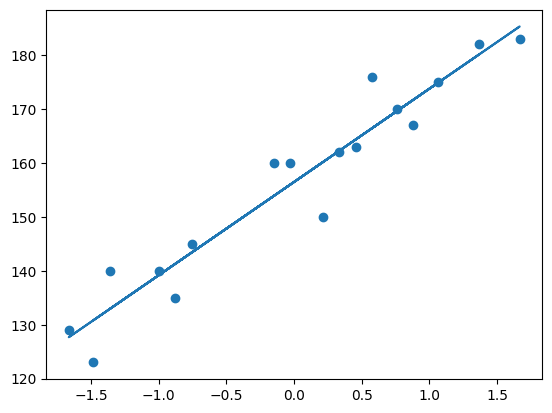

In [52]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train))

In [53]:
# for test data

y_pred = model.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

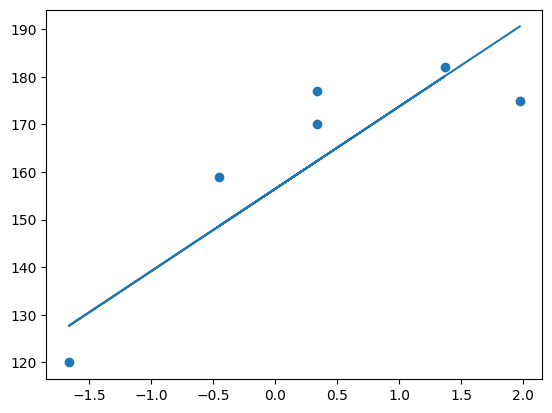

In [54]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("mean absolute error : ",mae)
print("mean squared error : ",mse)
print("roor mean squared error : ",rmse)

mean absolute error :  9.66512588679501
mean squared error :  114.84069295228699
roor mean squared error :  10.716374991212605


In [57]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("score: ",score)

score:  0.7360826717981276
